In [1]:
import pandas as pd
import numpy as np
import auxiliary as aux
import figs

In [2]:
df = pd.read_csv('data3.csv')

df = aux.deserialize(df)
df.head(15)

,specimen,component,fit_type,n,from,to,Ds,Is,Dg,Ig,Dt,It,mad,demag,coefficients,treatment,gcpts_s,gcpts_g,gcpts_t
0,ED5-1A,A,line,10,0,500,-170.575275,54.078042,48.922378,83.500860,138.922378,83.500860,2.608639,TH,"[0.861966300360766, 0.7948717718718545, 0.6206...","[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...",None,None,None
1,ED5-1A,C,line,7,500,570,-166.169801,76.892224,100.004265,63.570072,-169.995735,63.570072,8.377881,TH,"[0.32920691649643297, 0.2994716554678818, 0.29...","[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...",None,None,None
2,ED5-1A,C,plane,12,0,540,-140.141419,-31.356315,-39.817414,0.466059,50.182586,0.466059,32.057894,TH,None,"[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...","[[12.505035376570888, -55.54727011786083], [11...","[[-126.78194348776941, -81.2668949217787], [-1...","[[-36.781943487769404, -81.2668949217787], [-3..."
3,ED5-3B,A,line,10,0,500,-168.782998,51.679422,58.486045,72.402960,148.486045,72.402960,1.481830,TH,"[1.2660153049083327, 1.2024833575303722, 0.868...","[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...",None,None,None
4,ED5-3B,C,line,7,500,570,162.695661,56.148490,106.758302,66.694089,-163.241698,66.694089,4.816526,TH,"[0.5074440084843839, 0.3817738909863904, 0.381...","[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...",None,None,None
5,ED5-3B,C,plane,12,0,540,-6.825044,36.915451,76.303732,-16.810003,166.303732,-16.810003,15.015697,TH,None,"[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...","[[3.5402957914851347, -52.63079885088999], [4....","[[-105.4431315444162, -73.1826220913839], [-10...","[[-15.443131544416199, -73.1826220913839], [-1..."
6,ED5-5B,A,line,10,0,500,-166.730382,60.354553,47.668369,79.680863,137.668369,79.680863,2.567898,TH,"[1.4400579125376374, 1.195473273597549, 0.8542...","[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...",None,None,None
7,ED5-5B,C,line,7,500,570,170.492051,63.681685,108.057335,78.239101,-161.942665,78.239101,5.919067,TH,"[0.7277991940020564, 0.7277991940020564, 0.727...","[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...",None,None,None
8,ED5-5B,C,plane,12,0,540,139.724258,-19.377263,-131.218175,9.681114,-41.218175,9.681114,35.679621,TH,None,"[0, 100, 200, 250, 300, 350, 400, 440, 480, 50...","[[7.552510463974908, -62.35085328465769], [8.3...","[[-113.20892162769087, -79.83030248684773], [-...","[[-23.208921627690877, -79.83030248684773], [-..."


Comp. A mean (n=3): Dec: 53.41, Inc: 78.58, a95: 8.81
Comp. C mean (n=6): Dec: 100.80, Inc: 71.73, a95: 7.24


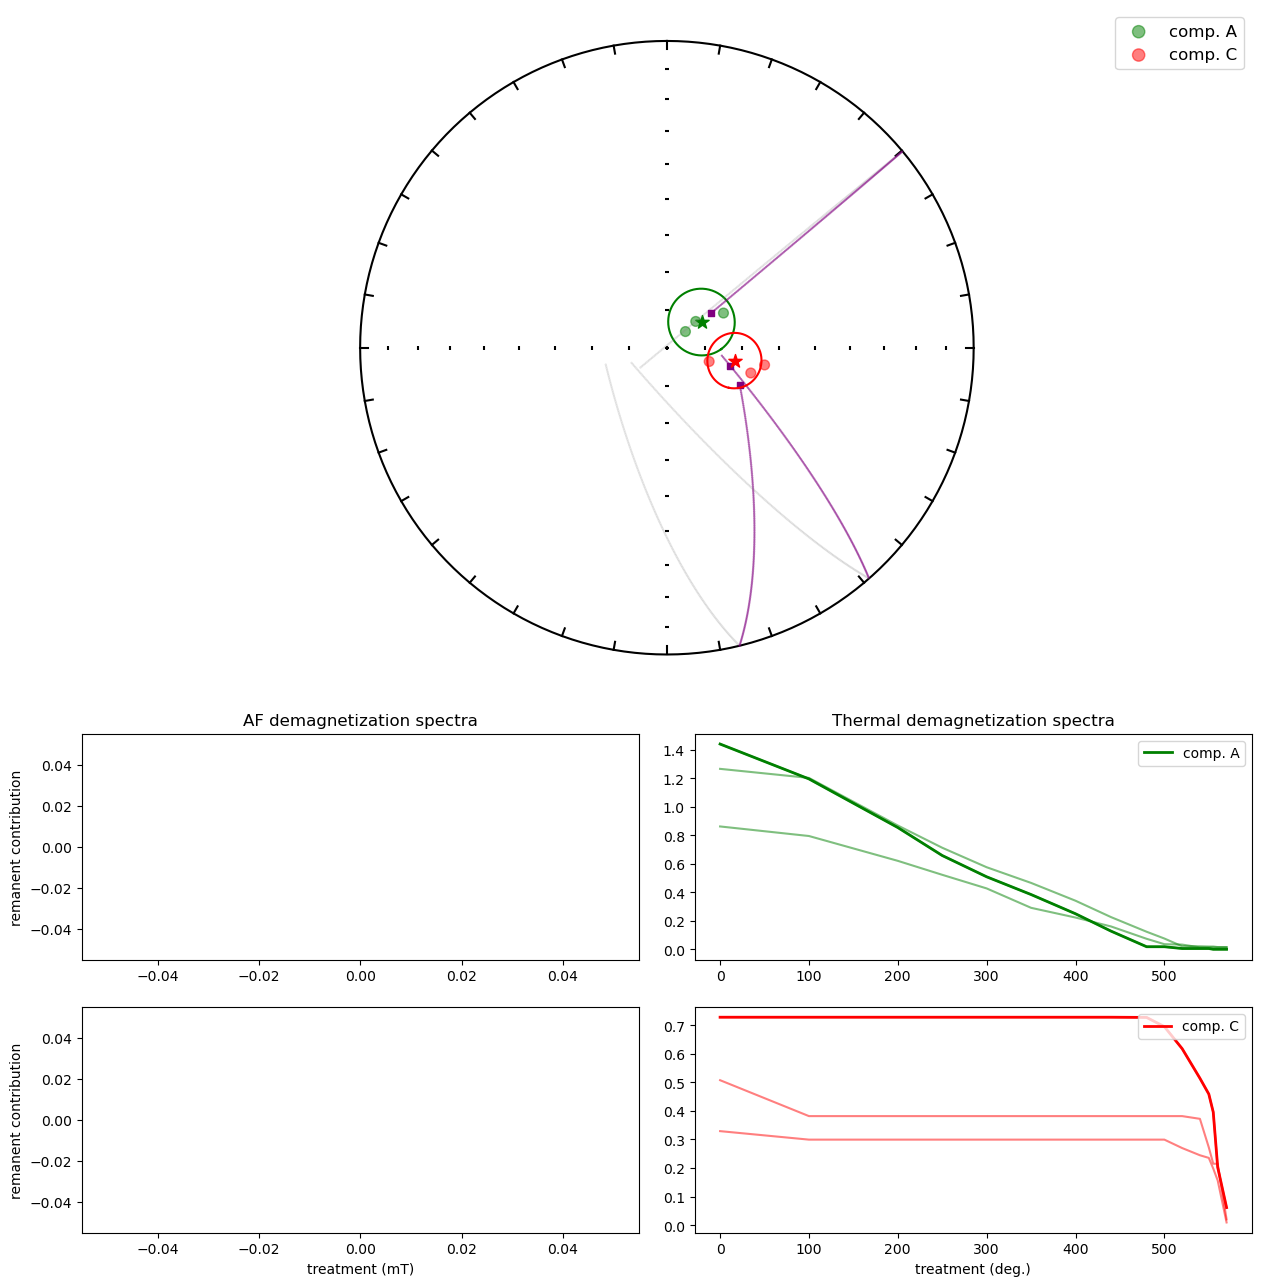

In [9]:
components = df['component'].unique()
comp_dfs = []
for component in components: comp_dfs.append(df[df['component'] == component])
    
coordinates = 'g'
colors = ['green', 'red']

fmeans = []
for i in range(len(comp_dfs)): 
    fmean, pests = aux.fisher_mean(comp_dfs[i], coordinates, flip='y', w_gcs='y')
    print (f"Comp. {components[i]} mean (n={fmean['n']}): Dec: {fmean['dec']:.2f}, Inc: {fmean['inc']:.2f}, a95: {fmean['alpha95']:.2f}")
    fmeans.append(fmean)

mean_decay = aux.mean_decay(comp_dfs)

figs.overview_plt(comp_dfs, fmeans, pests, mean_decay, coordinates, colors)